In [1]:
cd /Users/martin/Git/estates/src

/Users/martin/Git/estates/src


In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data import make_rentals, preprocess_rentals

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
rentals = make_rentals('../data/silver')
df = preprocess_rentals(rentals)

In [10]:
df.head()

,theatre,cinema,groceries,candy_shop,tram,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground,disposition,area_m2,furnishing,elevator,category,efficiency,floor,building_type,building_state,ownership,district,price
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1+kk,30.00,0.00,1.00,flat,7.00,3.00,Cihlová,Velmi dobrý,Osobní,brno-mesto,11200
4,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2+1,55.00,0.00,0.00,flat,5.00,3.00,Cihlová,Po rekonstrukci,Osobní,ostrava-mesto,7950
5,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1+1,28.00,0.00,0.00,flat,5.00,2.00,Cihlová,Dobrý,Osobní,karvina,3450
6,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,2+1,56.00,0.00,0.00,flat,5.00,4.00,Cihlová,Dobrý,Osobní,karvina,6000
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,rodinny,350.00,0.00,0.00,house,7.00,2.00,Cihlová,Novostavba,Osobní,ostatni,90000


In [11]:
df.shape

(12828, 31)

# price (target)

In [9]:
price = rentals.loc[:, 'price']

In [26]:
price.describe(percentiles=[.25, 0.5, .75, .9, .99])

count      12845.00000
mean       20350.73928
std       155637.46506
min            6.00000
25%         9900.00000
50%        12500.00000
75%        17500.00000
90%        29000.00000
99%        92312.16000
max     11220000.00000
Name: price, dtype: float64

In [27]:
price.isna().sum()

0

In [33]:
rentals.loc[rentals.price > 100000, :].head(10)

,price,area_m2,district,disposition,category,furnishing,efficiency,floor,building_type,building_state,ownership,tram,elevator,theatre,cinema,groceries,candy_shop,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground
14,2600000,200.00000,NaN,4+1,flat,1.00000,7.00000,1.00000,Cihlová,Po rekonstrukci,Osobní,NaN,NaN,152.00000,NaN,1021.00000,74.00000,291.00000,132.00000,158.00000,284.00000,148.00000,272.00000,113.00000,120.00000,257.00000,161.00000,484.00000,105.00000,224.00000,478.00000
172,139800,176.00000,praha 3,4+kk,flat,1.00000,NaN,5.00000,Smíšená,Po rekonstrukci,Osobní,161.00000,True,658.00000,754.00000,619.00000,187.00000,231.00000,1075.00000,208.00000,187.00000,684.00000,675.00000,24.00000,100.00000,264.00000,744.00000,166.00000,174.00000,303.00000,64.00000
810,130000,550.00000,NaN,vila,house,0.00000,NaN,3.00000,Cihlová,Dobrý,NaN,NaN,NaN,NaN,4672.00000,2936.00000,2124.00000,2161.00000,5771.00000,2106.00000,2185.00000,1043.00000,207.00000,1139.00000,1847.00000,1501.00000,1973.00000,2170.00000,1134.00000,1098.00000,1162.00000
930,124800,163.00000,praha 3,4+kk,flat,1.00000,NaN,5.00000,Smíšená,Po rekonstrukci,Osobní,161.00000,True,658.00000,754.00000,619.00000,187.00000,231.00000,1075.00000,208.00000,187.00000,684.00000,675.00000,24.00000,100.00000,264.00000,744.00000,166.00000,174.00000,303.00000,64.00000
1433,110000,400.00000,praha 5,vila,house,0.00000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,139800,174.00000,praha 3,4+kk,flat,0.00000,7.00000,5.00000,Smíšená,Velmi dobrý,Osobní,161.00000,True,658.00000,754.00000,619.00000,187.00000,231.00000,1075.00000,208.00000,187.00000,684.00000,675.00000,24.00000,100.00000,264.00000,744.00000,166.00000,174.00000,303.00000,64.00000
2370,110000,360.00000,praha 6,rodinny,house,0.00000,NaN,3.00000,Cihlová,Velmi dobrý,NaN,1702.00000,NaN,1018.00000,3792.00000,2496.00000,1596.00000,1363.00000,1824.00000,1162.00000,1402.00000,872.00000,241.00000,574.00000,182.00000,1262.00000,2160.00000,1364.00000,745.00000,1145.00000,330.00000
2697,552500,65.00000,NaN,2+1,flat,0.00000,7.00000,2.00000,Cihlová,Velmi dobrý,Osobní,2100.00000,False,1854.00000,1350.00000,1545.00000,353.00000,872.00000,278.00000,643.00000,438.00000,847.00000,62.00000,453.00000,501.00000,180.00000,1000.00000,432.00000,102.00000,97.00000,239.00000
2909,160000,580.00000,praha 5,vila,house,0.50000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,374.00000,True,986.00000,1787.00000,1863.00000,1822.00000,538.00000,1111.00000,579.00000,477.00000,755.00000,207.00000,402.00000,282.00000,457.00000,1849.00000,307.00000,451.00000,388.00000,382.00000
3017,110000,350.00000,NaN,rodinny,house,0.00000,7.00000,NaN,Cihlová,Dobrý,NaN,NaN,NaN,4307.00000,4307.00000,851.00000,885.00000,735.00000,4027.00000,214.00000,143.00000,368.00000,186.00000,170.00000,210.00000,290.00000,2243.00000,269.00000,144.00000,269.00000,309.00000


In [28]:
price_filtered = price[price < 100000]

/Users/martin/opt/miniconda3/envs/estates/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

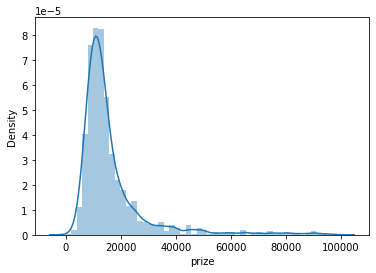

In [29]:
sns.distplot(price_filtered)

# Area

In [37]:
area = rentals.area_m2

In [143]:
rentals = rentals.assign(area_m2_bins = pd.qcut(data.area_m2, 5))

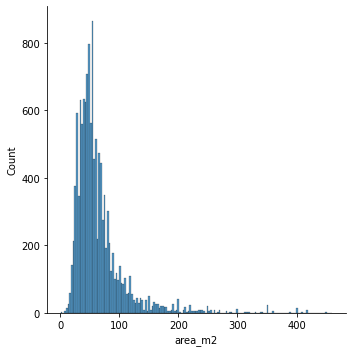

In [41]:
sns.displot(area[area < 500])

In [42]:
area[area > 500].shape[0]

20

In [44]:
rentals[rentals.area_m2 > 500].head(10)

,price,area_m2,district,disposition,category,furnishing,efficiency,floor,building_type,building_state,ownership,tram,elevator,theatre,cinema,groceries,candy_shop,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground
810,130000,550.00000,NaN,vila,house,0.00000,NaN,3.00000,Cihlová,Dobrý,NaN,NaN,NaN,NaN,4672.00000,2936.00000,2124.00000,2161.00000,5771.00000,2106.00000,2185.00000,1043.00000,207.00000,1139.00000,1847.00000,1501.00000,1973.00000,2170.00000,1134.00000,1098.00000,1162.00000
1704,100000,520.00000,praha 5,rodinny,house,NaN,7.00000,4.00000,Cihlová,Velmi dobrý,NaN,263.00000,NaN,1268.00000,2159.00000,2192.00000,1436.00000,1089.00000,1092.00000,322.00000,297.00000,192.00000,145.00000,212.00000,227.00000,266.00000,397.00000,401.00000,272.00000,293.00000,189.00000
2909,160000,580.00000,praha 5,vila,house,0.50000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,374.00000,True,986.00000,1787.00000,1863.00000,1822.00000,538.00000,1111.00000,579.00000,477.00000,755.00000,207.00000,402.00000,282.00000,457.00000,1849.00000,307.00000,451.00000,388.00000,382.00000
3467,150000,526.00000,praha 5,rodinny,house,0.00000,7.00000,5.00000,Cihlová,Velmi dobrý,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3572,100000,502.00000,praha 5,vila,house,NaN,NaN,NaN,Cihlová,Velmi dobrý,NaN,133.00000,NaN,302.00000,245.00000,371.00000,349.00000,885.00000,1293.00000,315.00000,96.00000,96.00000,120.00000,315.00000,29.00000,598.00000,566.00000,43.00000,96.00000,187.00000,382.00000
6385,350000,600.00000,NaN,NaN,house,1.00000,NaN,3.00000,Cihlová,Velmi dobrý,NaN,NaN,NaN,NaN,NaN,3192.00000,2031.00000,863.00000,452.00000,2161.00000,2031.00000,1352.00000,112.00000,64.00000,12.00000,64.00000,3135.00000,586.00000,412.00000,563.00000,225.00000
26974,130000,550.00000,NaN,rodinny,house,0.00000,3.00000,3.00000,Cihlová,Velmi dobrý,NaN,NaN,NaN,4911.00000,4911.00000,1692.00000,1715.00000,1426.00000,4454.00000,979.00000,1008.00000,709.00000,18.00000,979.00000,589.00000,597.00000,2403.00000,1055.00000,417.00000,1055.00000,448.00000
27198,75000,528.00000,praha 10,rodinny,house,0.50000,3.00000,2.00000,Cihlová,Novostavba,NaN,1998.00000,NaN,2858.00000,4000.00000,1249.00000,1087.00000,1774.00000,1537.00000,1286.00000,1265.00000,801.00000,123.00000,1328.00000,852.00000,466.00000,1250.00000,1367.00000,664.00000,1038.00000,648.00000
27674,185000,1000.00000,praha 5,vila,house,NaN,NaN,4.00000,Cihlová,Velmi dobrý,NaN,494.00000,NaN,865.00000,2989.00000,2479.00000,810.00000,725.00000,772.00000,759.00000,774.00000,316.00000,111.00000,1739.00000,740.00000,775.00000,934.00000,775.00000,441.00000,837.00000,596.00000
30919,160000,580.00000,praha 5,vila,house,0.50000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
area.describe(percentiles=[.25, 0.5, .75, .9, .99])

count   12844.00000
mean       67.83736
std       153.78677
min         1.00000
25%        40.00000
50%        54.00000
75%        75.00000
90%       110.00000
99%       288.00000
max     15746.00000
Name: area_m2, dtype: float64

In [85]:
area.isna().sum()

1

In [90]:
rentals[rentals.area_m2.isna()]

,price,area_m2,district,disposition,category,furnishing,efficiency,floor,building_type,building_state,ownership,tram,elevator,theatre,cinema,groceries,candy_shop,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground
35987,15000,NaN,NaN,1+kk,flat,NaN,NaN,3.00000,Cihlová,Novostavba,Osobní,NaN,NaN,1777.00000,756.00000,923.00000,746.00000,513.00000,557.00000,697.00000,589.00000,429.00000,601.00000,543.00000,679.00000,446.00000,689.00000,1034.00000,365.00000,836.00000,546.00000


# District

In [47]:
district = rentals.district

In [48]:
district.value_counts()

praha 5             1223
brno-mesto          1167
praha 4             1090
praha 3              872
praha 2              866
praha 1              859
praha 10             839
praha 6              683
praha 9              555
praha 8              486
ostrava-mesto        403
plzen-mesto          400
praha 7              320
olomouc              270
karvina              200
ceske budejovice     135
hradec kralove       110
pardubice             98
Name: district, dtype: int64

In [49]:
district.isna().sum()

2269

# Disposition

In [193]:
rentals.disposition.value_counts()

2+kk        3435
1+kk        2531
2+1         1879
3+kk        1366
1+1         1216
3+1         1100
4+kk         380
rodinny      285
4+1          280
ostatni       88
5+kk          71
vila          67
5+1           61
6 a vice      33
atypicky      32
chata         17
chalupa        4
Name: disposition, dtype: int64

In [52]:
rentals.disposition.isna().sum()

88

In [194]:
rentals.disposition = rentals.disposition.fillna('ostatni')

In [199]:
rentals.groupby('disposition')['area_m2'].median()

disposition
1+1         38.00000
1+kk        31.00000
2+1         57.00000
2+kk        51.00000
3+1         79.00000
3+kk        81.00000
4+1        130.00000
4+kk       120.00000
5+1        190.00000
5+kk       178.00000
6 a vice   230.00000
atypicky    86.00000
chalupa    120.00000
chata       50.00000
ostatni     20.00000
rodinny    208.00000
vila       320.00000
Name: area_m2, dtype: float64

# Category

In [53]:
rentals.category.value_counts()

flat     12470
house      375
Name: category, dtype: int64

In [54]:
rentals.category.isna().sum()

0

# Furnishing

In [58]:
rentals.furnishing.value_counts()

1.00000    3722
0.00000    2887
0.50000    2721
Name: furnishing, dtype: int64

In [59]:
rentals.furnishing.isna().sum()

3515

In [93]:
rentals[rentals.furnishing.isna()].head(10)

,price,area_m2,district,disposition,category,furnishing,efficiency,floor,building_type,building_state,ownership,tram,elevator,theatre,cinema,groceries,candy_shop,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground
1,11200,30.00000,brno-mesto,1+kk,flat,NaN,NaN,3.00000,Cihlová,Velmi dobrý,Osobní,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7950,55.00000,ostrava-mesto,2+1,flat,NaN,5.00000,3.00000,Cihlová,Po rekonstrukci,Osobní,505.00000,NaN,1864.00000,4338.00000,1324.00000,254.00000,318.00000,2514.00000,222.00000,211.00000,575.00000,232.00000,254.00000,192.00000,266.00000,175.00000,490.00000,241.00000,280.00000,317.00000
5,3450,28.00000,karvina,1+1,flat,NaN,5.00000,2.00000,Cihlová,Dobrý,Osobní,NaN,NaN,NaN,1211.00000,738.00000,1048.00000,342.00000,356.00000,272.00000,244.00000,82.00000,112.00000,272.00000,133.00000,293.00000,144.00000,430.00000,538.00000,174.00000,1246.00000
6,6000,56.00000,karvina,2+1,flat,NaN,5.00000,4.00000,Cihlová,Dobrý,Osobní,NaN,NaN,NaN,231.00000,456.00000,231.00000,199.00000,1439.00000,234.00000,338.00000,464.00000,294.00000,193.00000,640.00000,114.00000,199.00000,426.00000,231.00000,292.00000,284.00000
9,9900,102.00000,plzen-mesto,3+kk,flat,NaN,7.00000,4.00000,Cihlová,Velmi dobrý,Osobní,24.00000,NaN,377.00000,1102.00000,1047.00000,394.00000,425.00000,339.00000,73.00000,169.00000,562.00000,54.00000,106.00000,275.00000,182.00000,117.00000,63.00000,16.00000,63.00000,334.00000
65,10000,36.00000,brno-mesto,1+kk,flat,NaN,7.00000,3.00000,Cihlová,Velmi dobrý,Osobní,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,19000,50.00000,praha 1,2+kk,flat,NaN,7.00000,6.00000,Cihlová,Po rekonstrukci,Osobní,187.00000,NaN,319.00000,693.00000,639.00000,161.00000,624.00000,1066.00000,303.00000,334.00000,327.00000,105.00000,568.00000,106.00000,33.00000,783.00000,280.00000,18.00000,576.00000,457.00000
77,9500,29.00000,praha 7,1+kk,flat,NaN,7.00000,4.00000,Cihlová,Dobrý,Osobní,221.00000,NaN,297.00000,381.00000,1491.00000,335.00000,272.00000,803.00000,240.00000,387.00000,379.00000,180.00000,424.00000,44.00000,428.00000,493.00000,464.00000,289.00000,103.00000,320.00000
89,21000,55.00000,praha 1,3+kk,flat,NaN,5.00000,3.00000,Cihlová,Po rekonstrukci,Osobní,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,16900,40.00000,praha 4,2+kk,flat,NaN,1.00000,1.00000,Smíšená,Novostavba,Osobní,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Efficiency

In [60]:
rentals.efficiency.describe()

count   10585.00000
mean        5.72064
std         1.90513
min         1.00000
25%         4.00000
50%         7.00000
75%         7.00000
max         7.00000
Name: efficiency, dtype: float64

<AxesSubplot:>

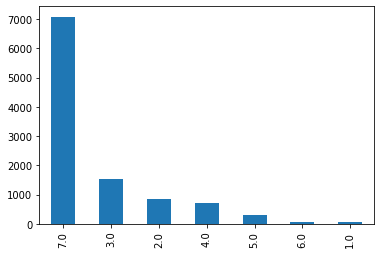

In [65]:
rentals.efficiency.value_counts().plot(kind='bar')

In [86]:
rentals.efficiency.isna().sum()

2260

In [145]:
rentals.efficiency.median()

7.0

# Floor

In [66]:
rentals.floor.describe()

count   12722.00000
mean        3.27032
std         2.10030
min        -1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max        20.00000
Name: floor, dtype: float64

<AxesSubplot:>

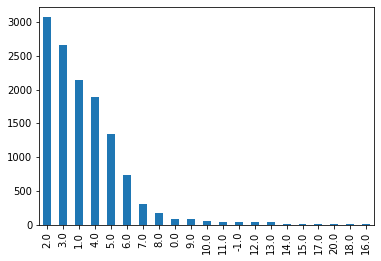

In [67]:
rentals.floor.value_counts().plot(kind='bar')

In [87]:
rentals.floor.isna().sum()

123

In [92]:
rentals[rentals.floor.isna()].sample(10)

,price,area_m2,district,disposition,category,furnishing,efficiency,floor,building_type,building_state,ownership,tram,elevator,theatre,cinema,groceries,candy_shop,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground
24833,85000,288.00000,praha 6,rodinny,house,0.00000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,2043.00000,NaN,570.00000,4319.00000,2773.00000,2040.00000,839.00000,2119.00000,649.00000,868.00000,373.00000,318.00000,90.00000,493.00000,836.00000,1896.00000,839.00000,472.00000,873.00000,289.00000
42666,65000,417.00000,praha 4,rodinny,house,1.00000,2.00000,NaN,Cihlová,Velmi dobrý,NaN,3530.00000,NaN,4021.00000,1272.00000,784.00000,677.00000,1882.00000,3170.00000,395.00000,243.00000,326.00000,384.00000,240.00000,183.00000,395.00000,668.00000,670.00000,331.00000,347.00000,135.00000
2909,160000,580.00000,praha 5,vila,house,0.50000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,374.00000,True,986.00000,1787.00000,1863.00000,1822.00000,538.00000,1111.00000,579.00000,477.00000,755.00000,207.00000,402.00000,282.00000,457.00000,1849.00000,307.00000,451.00000,388.00000,382.00000
33287,89000,350.00000,NaN,rodinny,house,0.00000,NaN,NaN,Cihlová,Velmi dobrý,NaN,NaN,NaN,4416.00000,4416.00000,899.00000,1014.00000,674.00000,4280.00000,952.00000,892.00000,787.00000,637.00000,1148.00000,1072.00000,617.00000,1380.00000,1076.00000,617.00000,1076.00000,1324.00000
743,60000,165.00000,praha 5,rodinny,house,0.00000,2.00000,NaN,Smíšená,Novostavba,NaN,1744.00000,NaN,1502.00000,1185.00000,360.00000,343.00000,1432.00000,1681.00000,537.00000,310.00000,893.00000,349.00000,950.00000,513.00000,513.00000,716.00000,538.00000,310.00000,257.00000,152.00000
25795,15000,55.00000,NaN,rodinny,house,0.50000,7.00000,NaN,Cihlová,Dobrý,NaN,2813.00000,NaN,NaN,NaN,2585.00000,2596.00000,187.00000,800.00000,1499.00000,2011.00000,375.00000,107.00000,1252.00000,445.00000,445.00000,815.00000,445.00000,375.00000,285.00000,781.00000
12352,55000,300.00000,praha 5,rodinny,house,0.00000,7.00000,NaN,Cihlová,Dobrý,NaN,396.00000,False,2425.00000,2634.00000,1340.00000,551.00000,677.00000,1723.00000,1128.00000,343.00000,1171.00000,334.00000,1137.00000,702.00000,123.00000,470.00000,950.00000,228.00000,846.00000,402.00000
43259,65000,340.00000,praha 5,rodinny,house,0.00000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,572.00000,NaN,973.00000,1845.00000,1849.00000,1330.00000,980.00000,1580.00000,795.00000,724.00000,427.00000,192.00000,500.00000,274.00000,53.00000,997.00000,593.00000,436.00000,589.00000,27.00000
30919,160000,580.00000,praha 5,vila,house,0.50000,7.00000,NaN,Cihlová,Velmi dobrý,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52871,75000,200.00000,praha 6,vila,house,0.00000,4.00000,NaN,Cihlová,Po rekonstrukci,NaN,105.00000,NaN,681.00000,2426.00000,2314.00000,591.00000,925.00000,1295.00000,1075.00000,692.00000,201.00000,99.00000,77.00000,440.00000,450.00000,742.00000,427.00000,255.00000,1012.00000,262.00000


# Building_type

In [71]:
rentals.building_type.value_counts()

Cihlová      9391
Panelová     2089
Smíšená      1003
Skeletová     299
Dřevěná        26
Kamenná        23
Montovaná      14
Name: building_type, dtype: int64

In [72]:
rentals.building_type.isna().sum()

0

# Building_state

In [12]:
df.building_state.value_counts()

Velmi dobrý          6675
Po rekonstrukci      2545
Dobrý                1818
Novostavba           1761
Před rekonstrukcí      18
Špatný                  5
K demolici              4
Ve výstavbě             1
Projekt                 1
Name: building_state, dtype: int64

In [74]:
rentals.building_state.isna().sum()

0

# Ownership

In [75]:
rentals.ownership.value_counts()

Osobní           11912
Družstevní         470
Státní/obecní       88
Name: ownership, dtype: int64

In [76]:
rentals.ownership.isna().sum()

375

# Elevator

In [84]:
rentals.elevator.value_counts()

True     6152
False    2611
Name: elevator, dtype: int64

In [88]:
rentals.elevator.isna().sum()

4082

# Points of interest

In [81]:
rentals.columns

Index(['price', 'area_m2', 'district', 'disposition', 'category', 'furnishing',
       'efficiency', 'floor', 'building_type', 'building_state', 'ownership',
       'tram', 'elevator', 'theatre', 'cinema', 'groceries', 'candy_shop',
       'veterinary', 'train', 'pharmacist', 'atm', 'sports', 'bus', 'doctors',
       'school', 'kindergarten', 'pub', 'post_office', 'restaurant',
       'seven_eleven', 'playground'],
      dtype='object')

In [79]:
rentals.tram.describe()

count   7353.00000
mean     634.77764
std      893.21820
min        3.00000
25%      140.00000
50%      262.00000
75%      660.00000
max     5925.00000
Name: tram, dtype: float64

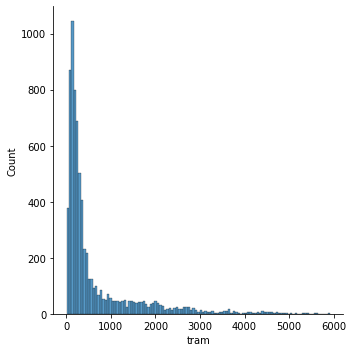

In [80]:
sns.displot(rentals.tram)

# Correlation with target

<AxesSubplot:>

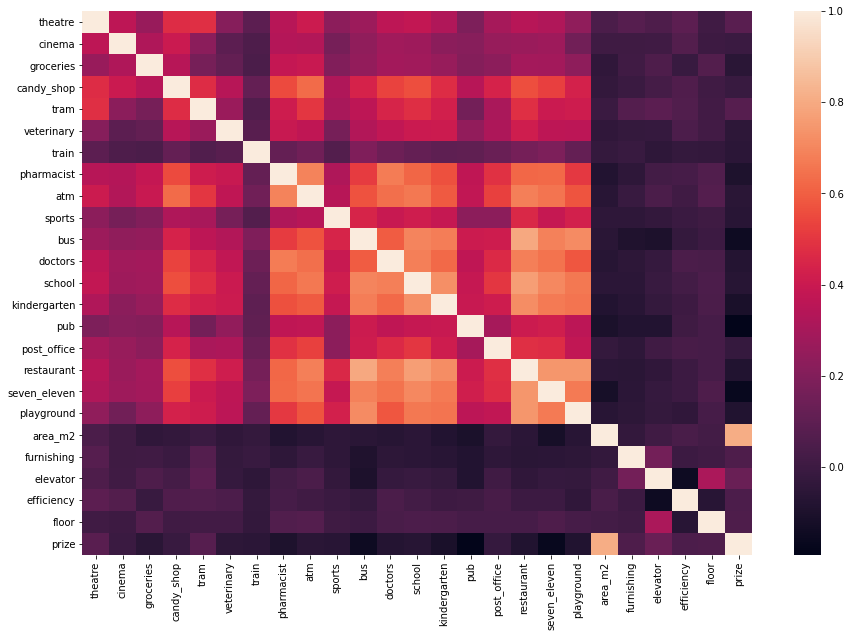

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

## Getting most out of area

<AxesSubplot:xlabel='area_m2', ylabel='price'>

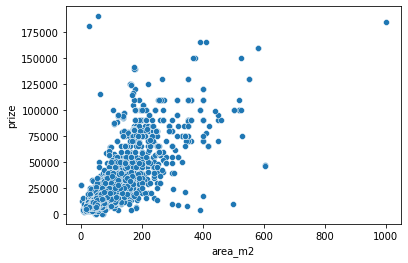

In [185]:
data = rentals[(rentals.area_m2 < 2000) & (rentals.price < 200000)]
sns.scatterplot(x=data.area_m2, y=data.price)

<AxesSubplot:>

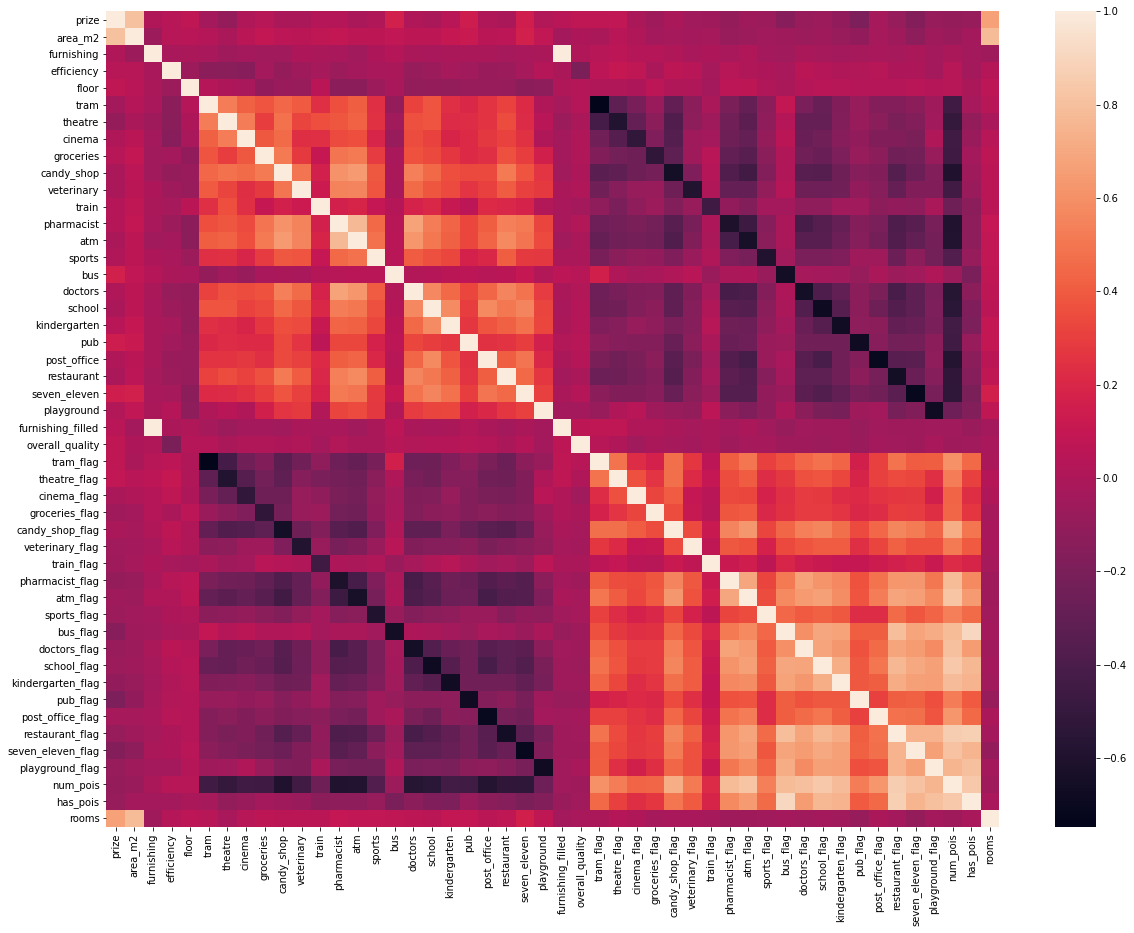

In [180]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr())

## Getting most out of furnishing

In [107]:
rentals.groupby('furnishing')['price'].median()

furnishing
0.00000    13000
0.50000    12000
1.00000    14900
Name: price, dtype: int64

In [108]:
rentals.groupby('furnishing')['price'].count()

furnishing
0.00000    2887
0.50000    2721
1.00000    3722
Name: price, dtype: int64

In [109]:
rentals = rentals.assign(furnishing_filled = rentals.furnishing.fillna(0))

In [110]:
rentals.groupby('furnishing_filled')['price'].median()

furnishing_filled
0.00000    12000
0.50000    12000
1.00000    14900
Name: price, dtype: int64

In [117]:
rentals.groupby(['disposition', 'furnishing_filled'])['price'].mean()

disposition  furnishing_filled
1+1          0.00000                8749.17273
             0.50000                9964.64310
             1.00000               10884.47104
1+kk         0.00000                9194.82222
             0.50000                9676.21284
             1.00000               10907.07843
2+1          0.00000               12470.09017
             0.50000               12289.68170
             1.00000               15188.49057
2+kk         0.00000               15094.74337
             0.50000               15931.42595
             1.00000               17265.51976
3+1          0.00000               27072.90065
             0.50000               16638.57466
             1.00000               24405.61887
3+kk         0.00000               21310.87000
             0.50000               20684.66225
             1.00000               27491.28233
4+1          0.00000               34216.14483
             0.50000               28663.17073
             1.00000         

In [135]:
data.groupby(['area_m2_bins', 'furnishing'])['price'].median()

area_m2_bins    furnishing
(0.999, 36.0]   0.00000       8900.00000
                0.50000       9000.00000
                1.00000       9900.00000
(36.0, 48.0]    0.00000      10900.00000
                0.50000      11000.00000
                1.00000      12350.00000
(48.0, 60.0]    0.00000      12500.00000
                0.50000      12000.00000
                1.00000      15000.00000
(60.0, 80.0]    0.00000      14800.00000
                0.50000      14256.50000
                1.00000      17500.00000
(80.0, 1000.0]  0.00000      30000.00000
                0.50000      23000.00000
                1.00000      30000.00000
Name: price, dtype: float64

In [13]:
import numpy as np

In [16]:
rentals.furnishing = rentals.furnishing.apply(lambda x: x==1).value_counts()

In [ ]:
df[['price', 'furnishing']]

## Getting most out of POI

In [17]:
poi_cols = [
    'tram', 'theatre', 'cinema', 'groceries', 'candy_shop',
    'veterinary', 'train', 'pharmacist', 'atm', 'sports', 'bus', 'doctors',
    'school', 'kindergarten', 'pub', 'post_office', 'restaurant',
    'seven_eleven', 'playground'
]

In [18]:
df = df.assign(num_pois = df[poi_cols].sum(axis=1))

<AxesSubplot:>

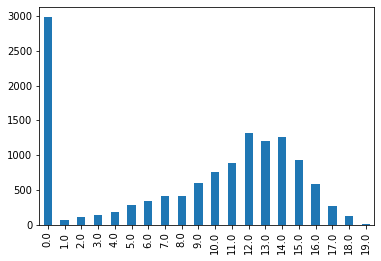

In [19]:
df.num_pois.value_counts().sort_index().plot(kind='bar')

In [164]:
rentals = rentals.assign(has_pois = rentals.num_pois > 0)

<AxesSubplot:>

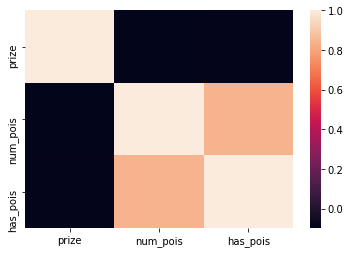

In [179]:
sns.heatmap(data[['price', 'num_pois', 'has_pois']].corr())

In [166]:
rentals.groupby('has_pois')['price'].median()

has_pois
False    14500
True     12000
Name: price, dtype: int64

## GMOF disposition

In [20]:
df.groupby('disposition')['area_m2'].median()

disposition
1+1         38.00
1+kk        31.00
2+1         57.00
2+kk        51.00
3+1         79.50
3+kk        81.00
4+1        130.00
4+kk       120.00
5+1        190.00
5+kk       178.00
6 a vice   230.00
atypicky    81.00
chalupa    120.00
chata       50.00
ostatni     20.00
rodinny    208.50
vila       320.00
Name: area_m2, dtype: float64

In [21]:
room_mapping = {
    '2+kk': 2,
    '1+kk': 1,
    '2+1': 2,
    '3+kk': 3,
    '1+1': 1,
    '3+1': 3,
    '4+kk': 4,
    'rodinny': 5,
    '4+1': 4,
    '5+kk': 5,
    'vila': 6,
    '5+1': 5,
    '6 a vice': 6,
    'atypicky': 3,
    'chata': 2,
    'chalupa': 4,
    'ostatni': 1
}

In [22]:
df = df.assign(rooms=df.disposition.map(room_mapping))

<AxesSubplot:xlabel='rooms'>

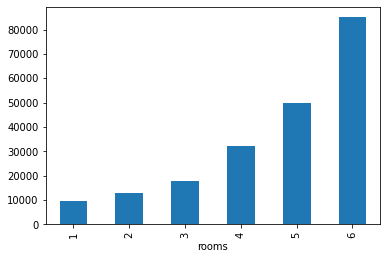

In [23]:
df.groupby('rooms')['price'].median().plot(kind='bar')

<AxesSubplot:xlabel='rooms', ylabel='price'>

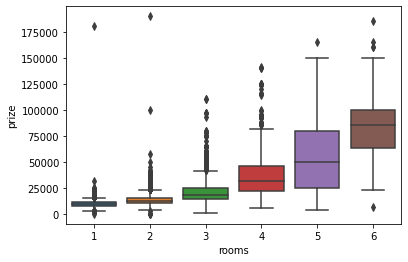

In [24]:
sns.boxplot(x=df.rooms, y=df.price)

In [26]:
df.loc[:, ['price', 'rooms']].corr()

,price,rooms
price,1.00,0.67
rooms,0.67,1.00


## GMFO overall_qual

<AxesSubplot:xlabel='overall_quality', ylabel='price'>

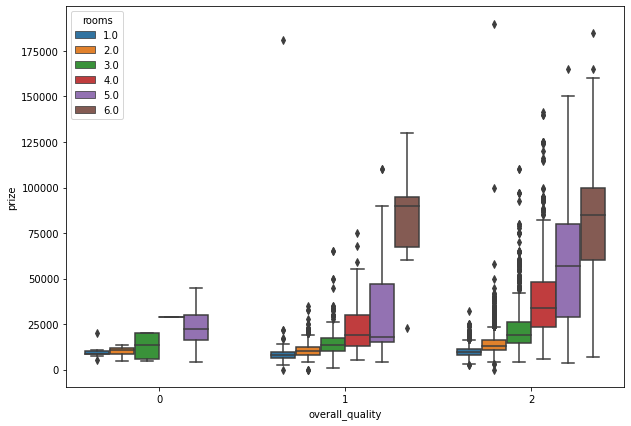

In [192]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x='overall_quality', y='price', hue='rooms')

In [187]:
data.loc[:, ['price', 'overall_quality']].corr()

,price,overall_quality
price,1.00000,0.12757
overall_quality,0.12757,1.00000


In [36]:
df.groupby('building_state')['price'].mean().sort_values()

building_state
Projekt              5000.00
K demolici           8872.50
Ve výstavbě         10000.00
Dobrý               12170.03
Před rekonstrukcí   13762.78
Špatný              14300.00
Po rekonstrukci     16870.42
Novostavba          17871.88
Velmi dobrý         18164.43
Name: price, dtype: float64

In [39]:
overall_quality_mapping = {
    'K demolici': 1,
    'Projekt': 2,
    'Špatný': 3,
    'Ve výstavbě': 4,
    'Dobrý': 5,         
    'Před rekonstrukcí': 6,
    'Po rekonstrukci': 7,
    'Novostavba': 8,
    'Velmi dobrý': 9,
}

In [38]:
df[df.building_state=='Projekt']

,theatre,cinema,groceries,candy_shop,tram,veterinary,train,pharmacist,atm,sports,bus,doctors,school,kindergarten,pub,post_office,restaurant,seven_eleven,playground,disposition,area_m2,furnishing,elevator,category,efficiency,floor,building_type,building_state,ownership,district,price,num_pois,rooms
26201,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,ostatni,16.00,1.00,0.00,flat,1.00,3.00,Cihlová,Projekt,Osobní,praha 9,5000,5.00,1


In [40]:
df = df.assign(overall_quality=df.building_state.map(overall_quality_mapping))

In [43]:
df[['price', 'overall_quality']].corr()

,price,overall_quality
price,1.00,0.12
overall_quality,0.12,1.00


# Final corr

<AxesSubplot:>

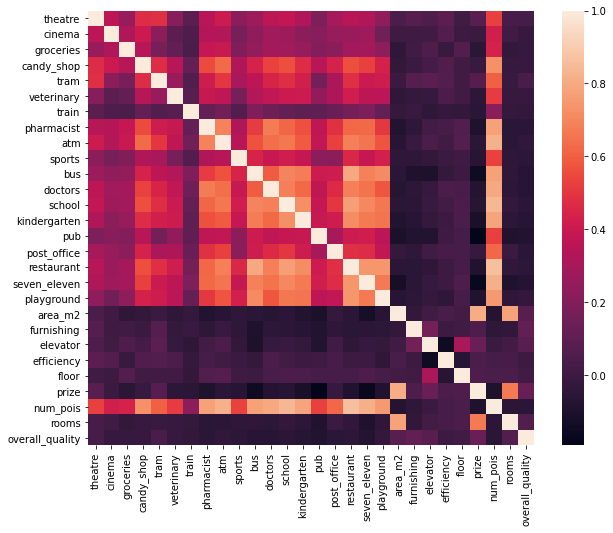

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())